<a href="https://colab.research.google.com/github/mozartMiBciBA/Data-Driven-Science-and-Engineering-ML-DySystems-and-Ctrl/blob/main/CH01_SEC04_3_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression 3 [Python]

These lectures follow Chapter 1 from:  "Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control"  by Brunton and Kutz


Referencia 1:https://www.youtube.com/watch?v=vNjLugdaGvs&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=21


Referencia 2:
Book Website: http://databookuw.com 


Referencia 3:
Book PDF: http://databookuw.com/databook.pdf


H.shape
(506, 14)


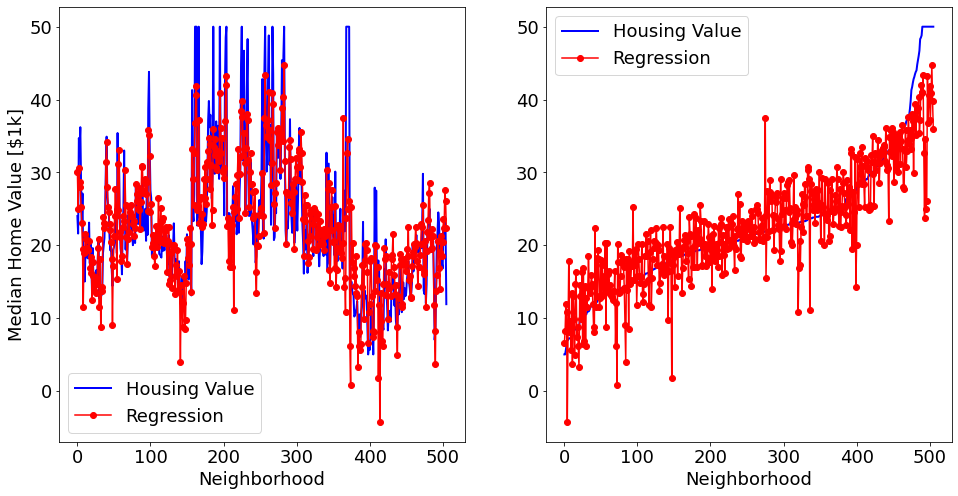

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
#H = np.loadtxt(os.path.join('..','DATA','housing.data'))

H = np.loadtxt(os.path.join('housing.data'))
print("H.shape")
print(H.shape)
b = H[:,-1] # housing values in $1000s
#print("b.shape")
#print(b.shape)

A = H[:,:-1] # other factors
#print("A.shape")
#print(A.shape)

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(b, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

Significancia de atributos

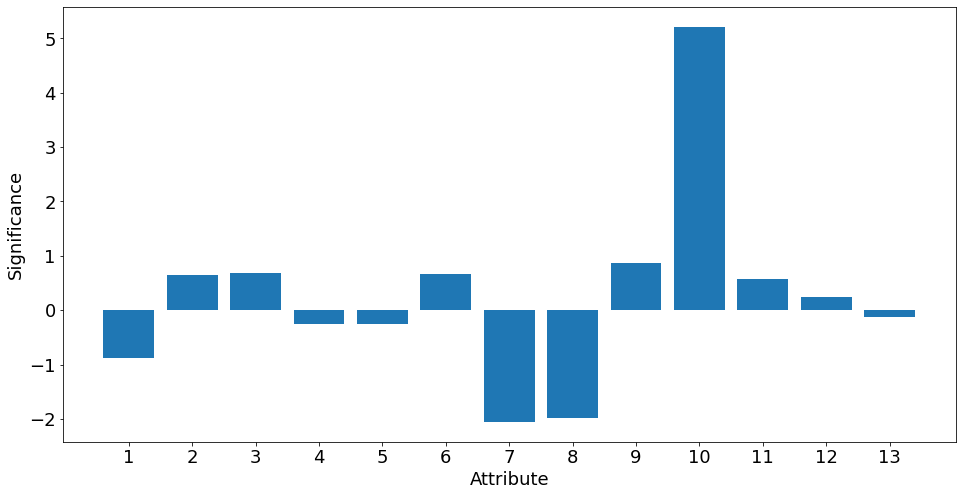

In [ ]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

Considerndo datos para entrenamiento y otros dato para prueba

H.shape
(506, 14)


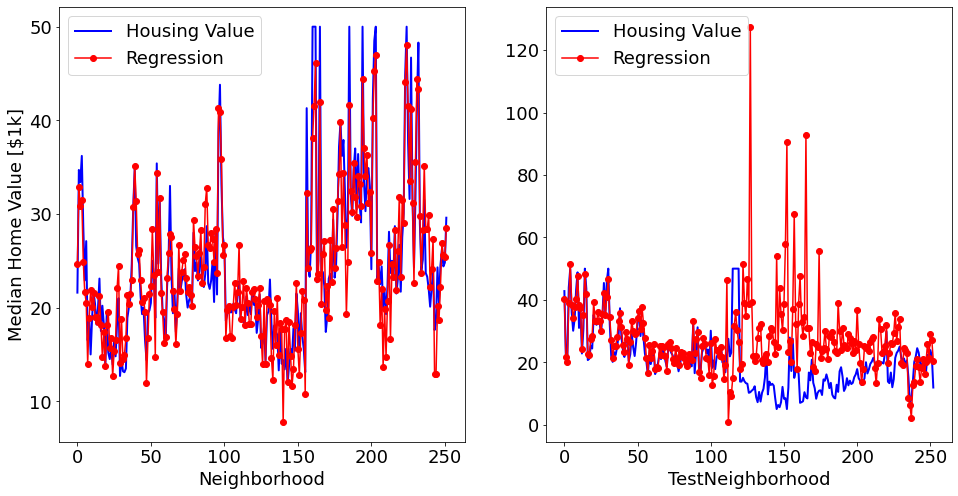

In [2]:
# Load dataset
#H = np.loadtxt(os.path.join('..','DATA','housing.data'))

H = np.loadtxt(os.path.join('housing.data'))
print("H.shape")
print(H.shape)

b = H[:,-1] # housing values in $1000s
#print("b.shape")
#print(b.shape)

A = H[:,:-1] # other factors
#print("A.shape")
#print(A.shape)

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
#U, S, VT = np.linalg.svd(A,full_matrices=0)
U, S, VT = np.linalg.svd(Atrain,full_matrices=0)

#x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(btrain, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)

#sort_ind = np.argsort(H[:,-1])
#b = b[sort_ind] # sorted 

plt.plot(btest, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('TestNeighborhood')
plt.legend()

plt.show()


Las graficas de datos de prueba (Test) no se ajustan a los valores reales de las casas, entonces se propone lo siguiente:


H.shape
(506, 14)


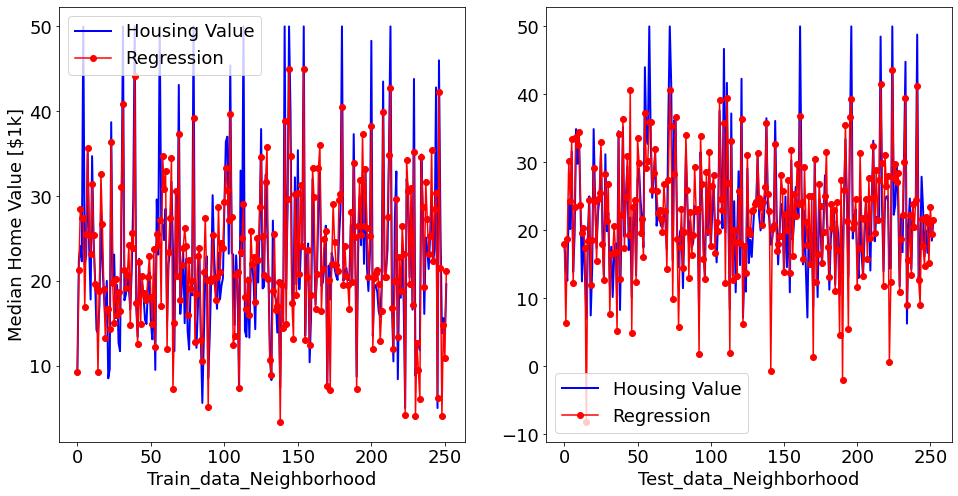

In [3]:
H = np.loadtxt(os.path.join('housing.data'))
print("H.shape")
print(H.shape)

b = H[:,-1] # housing values in $1000s


A = H[:,:-1] # other factors


# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253
p = np.random.permutation(506)
A = A[p,:]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
#U, S, VT = np.linalg.svd(A,full_matrices=0)
U, S, VT = np.linalg.svd(Atrain,full_matrices=0)

#x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(btrain, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Train_data_Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)

#sort_ind = np.argsort(H[:,-1])
#b = b[sort_ind] # sorted 

plt.plot(btest, Color='b', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Test_data_Neighborhood')
plt.legend()

plt.show()

